In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import emoji
import re
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import seaborn as sns
import numpy as np


In [3]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mrggi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
poli = pd.read_csv('politicos.csv')

In [8]:
poli.head()

,Unnamed: 0,tweets_id,tweets_in_thread,created_at,text,retweet_count,like_count,reply_count,quote_count,user_id,username,user_name,user_picture,verified,clean_text,mentions,hashtags,emojis
0,0,['1453442766982287361'],1,2021-10-27T19:25:33.000Z,"PARABÉNS, PRESIDENTE LULA | 76 anos com energi...",1423,16845,939,323,2670726740,LulaOficial,Lula,https://pbs.twimg.com/profile_images/145778941...,True,"['parabens', 'presidente', 'lula', 'ano', 'ene...",NaN,['#equipelula'],NaN
1,1,['1453676921393324036'],1,2021-10-28T10:56:00.000Z,Ao vivo em instantes: https://t.co/DC3AqHTIDc,139,607,42,14,2670726740,LulaOficial,Lula,https://pbs.twimg.com/profile_images/145778941...,True,"['viver', 'instante']",NaN,NaN,NaN
2,2,['1453681221603581952'],1,2021-10-28T11:13:05.000Z,Entrevista de Lula para a Rádio Jovem Pan de S...,630,3013,319,57,2670726740,LulaOficial,Lula,https://pbs.twimg.com/profile_images/145778941...,True,"['entrevisto', 'lula', 'radiar', 'jovem', 'pan...",NaN,NaN,NaN
3,3,['1453682338941095940'],1,2021-10-28T11:17:32.000Z,Fiz 76 anos ontem com muito orgulho. Não sinto...,1702,27763,1853,318,2670726740,LulaOficial,Lula,https://pbs.twimg.com/profile_images/145778941...,True,"['fazer', 'ano', 'ontem', 'orgulhar', 'sentir'...",NaN,NaN,NaN
4,4,['1453685308755746818'],1,2021-10-28T11:29:20.000Z,Para que a iniciativa privada se apodere do Es...,734,4697,302,66,2670726740,LulaOficial,Lula,https://pbs.twimg.com/profile_images/145778941...,True,"['iniciativo', 'privar', 'apoderar', 'estar', ...",NaN,NaN,NaN


In [5]:
poli.columns

NameError: name 'poli' is not defined

C:\Users\mrggi\AppData\Local\Temp\ipykernel_5544\3167007018.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),


<AxesSubplot:>

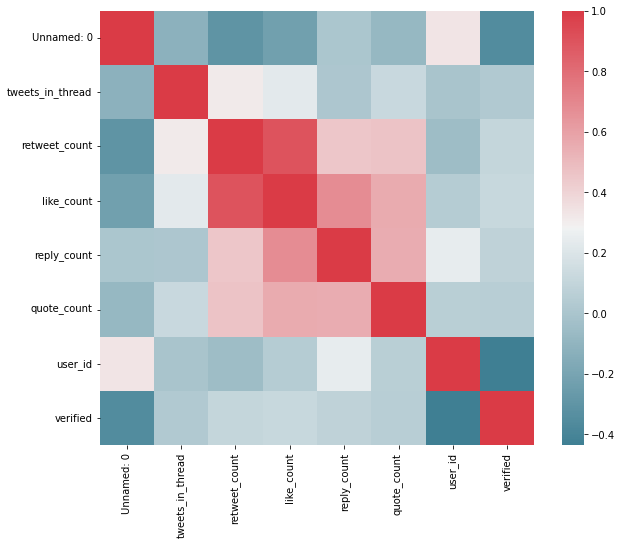

In [12]:
f, ax = plt.subplots(figsize=(10, 8))
corr = poli.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'tweets_in_thread'}>,
        <AxesSubplot:title={'center':'retweet_count'}>],
       [<AxesSubplot:title={'center':'like_count'}>,
        <AxesSubplot:title={'center':'reply_count'}>,
        <AxesSubplot:title={'center':'quote_count'}>],
       [<AxesSubplot:title={'center':'user_id'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

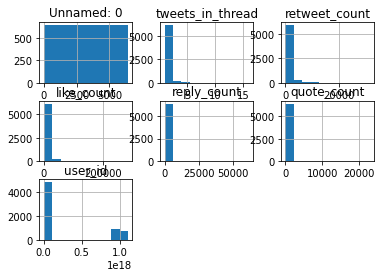

In [13]:
poli.hist()

c:\Users\mrggi\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\histograms.py:823: RuntimeWarning: divide by zero encountered in double_scalars
  norm = n_equal_bins / _unsigned_subtract(last_edge, first_edge)
c:\Users\mrggi\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\histograms.py:851: RuntimeWarning: invalid value encountered in multiply
  f_indices = _unsigned_subtract(tmp_a, first_edge) * norm


IndexError: index -9223372036854775808 is out of bounds for axis 0 with size 11

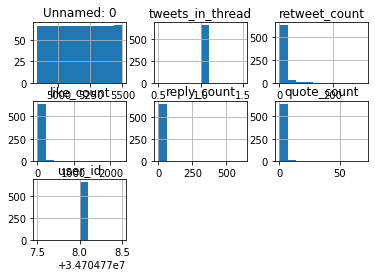

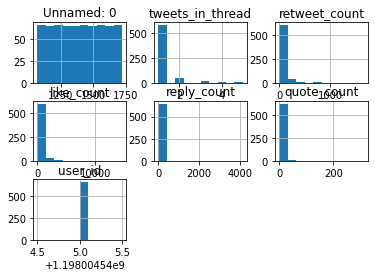

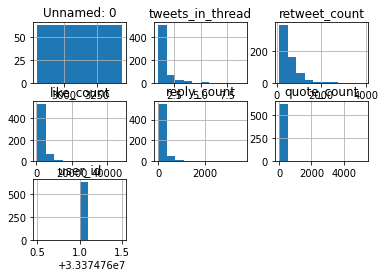

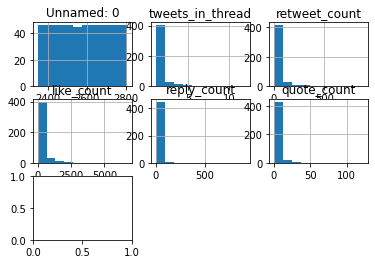

In [14]:
poli.groupby('user_name').hist()


In [4]:
poli.username.unique()

NameError: name 'poli' is not defined

In [ ]:
poli.groupby(['username'])['tweets_id'].count()

username
AndreJanonesAdv    655
LeoPericlesUP      417
LulaOficial        586
SF_Moro            714
Sen_Alessandro     517
SimoneTebetms      623
aldorebelo         661
cirogomes          630
jairbolsonaro      482
jdoriajr           687
lfdavilaoficial    459
Name: tweets_id, dtype: int64

## Análise da quantidade brutas

#### Retweets

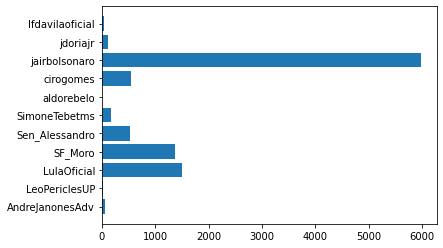

In [ ]:
ret = poli.groupby(['username'])['retweet_count'].mean().reset_index()
fig, ax = plt.subplots()
ax.barh(ret['username'], ret['retweet_count'])
plt.show()

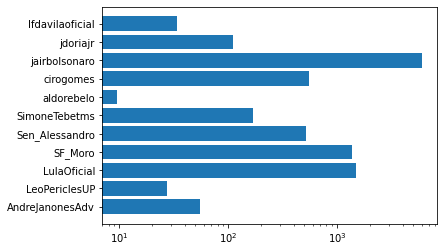

In [ ]:
ret = poli.groupby(['username'])['retweet_count'].mean().reset_index()
fig, ax = plt.subplots()
ax.barh(ret['username'], ret['retweet_count'])
ax.set_xscale('log')
plt.show()

#### Número de likes

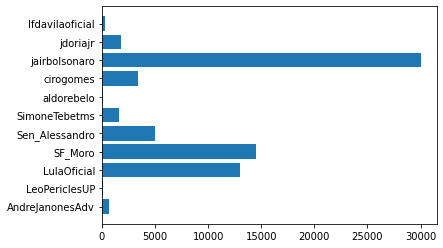

In [ ]:
ret = poli.groupby(['username'])['like_count'].mean().reset_index()
fig, ax = plt.subplots()
ax.barh(ret['username'], ret['like_count'])
plt.show()

#### Número de respostas

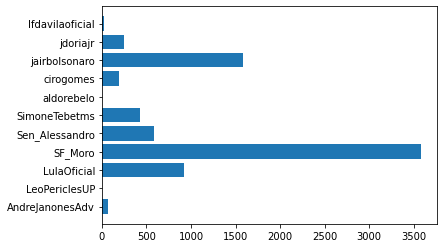

In [ ]:
ret = poli.groupby(['username'])['reply_count'].mean().reset_index()
fig, ax = plt.subplots()
ax.barh(ret['username'], ret['reply_count'])
plt.show()

#### Número de citações

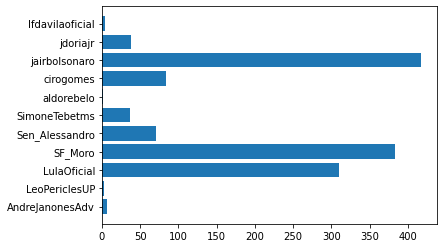

In [ ]:
ret = poli.groupby(['username'])['quote_count'].mean().reset_index()
fig, ax = plt.subplots()
ax.barh(ret['username'], ret['quote_count'])
plt.show()

#### Número de tweets na thread 

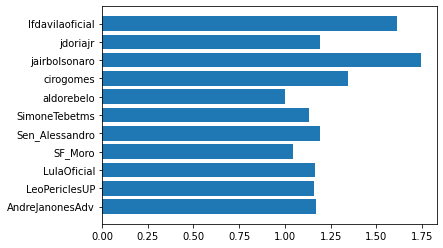

In [ ]:
ret = poli.groupby(['username'])['tweets_in_thread'].mean().reset_index()
fig, ax = plt.subplots()
ax.barh(ret['username'], ret['tweets_in_thread'])
plt.show()

## Especificidades de cada candidato

#### Hashtags

In [11]:
import string
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
stopwords =stopwords.words('portuguese')

In [12]:
poli['user_name'].unique()

array(['Lula', 'Jair M. Bolsonaro', 'André Janones', 'Simone Tebet',
       "Felipe d'Avila", 'Ciro Gomes', 'João Doria', 'Sergio Moro',
       'Aldo Rebelo', 'Leo Péricles', 'Senador Alessandro Vieira'],
      dtype=object)

In [13]:
poli.hashtags.fillna(' ')
test = poli.hashtags.astype(str).apply(lambda x: x.replace('[','').replace(']','').replace('\'','').strip())
poli.hashtags = test

*Bolsonaro nao usa hashtags?*

In [18]:
# Lula
poli[poli.user_name == 'Jair M. Bolsonaro'].hashtags.value_counts().reset_index()

,index,hashtags
0,nan,482


In [44]:
hashtags = poli[poli.user_name == 'Lula'].hashtags.value_counts().reset_index().drop(0)
hashtags

,index,hashtags
1,#equipelula,61
2,#76fatossobrelula,26
3,#lulaaovivo,10
4,#pt42anos,10
5,#lulanacbnvale,9
...,...,...
70,#76fatossobrelula23,1
71,#76fatossobrelula22,1
72,#76fatossobrelula21,1
73,#76fatossobrelula20,1


In [28]:
poli.hashtags=='#equipelula'

0        True
1       False
2       False
3       False
4       False
        ...  
6426    False
6427    False
6428    False
6429    False
6430    False
Name: hashtags, Length: 6431, dtype: bool

NameError: name 'vectors' is not defined

In [19]:
poli.columns

Index(['Unnamed: 0', 'tweets_id', 'tweets_in_thread', 'created_at', 'text',
       'retweet_count', 'like_count', 'reply_count', 'quote_count', 'user_id',
       'username', 'user_name', 'user_picture', 'verified', 'clean_text',
       'mentions', 'hashtags', 'emojis'],
      dtype='object')

In [26]:

mu = poli[(poli.hashtags=='#equipelula')].like_count.mean()
sigma = poli[(poli.hashtags=='#equipelula')].like_count.std()

<AxesSubplot:>

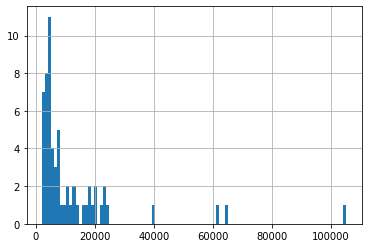

In [40]:
poli[(poli.hashtags=='#equipelula')].like_count.hist(bins=100)

<AxesSubplot:>

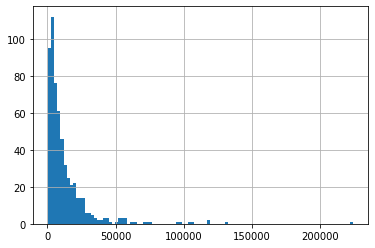

In [46]:
poli[(poli.user_name == 'Lula')].like_count.hist(bins = 100)

In [48]:
poli[(poli.user_name == 'Lula')].shape

(586, 18)

<AxesSubplot:>

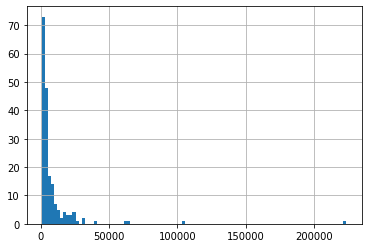

In [49]:
poli[(poli.user_name == 'Lula') & (poli.hashtags != 'nan')].like_count.hist(bins = 100)

In [ ]:
poli

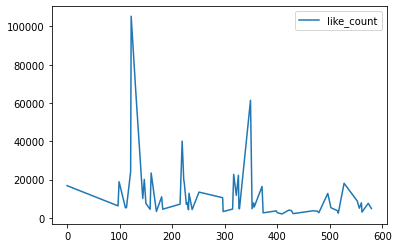

In [33]:
df = poli[(poli.hashtags=='#equipelula')][['like_count','created_at']].plot()




In [ ]:
for 

In [16]:
texts = list(poli[(poli.hashtags=='#equipelula') & (poli.user_name == 'Lula')].clean_text.apply(extract_words).apply(lambda x: ' '.join(x)))
vectorizer = CountVectorizer().fit_transform(texts)
vectors = vectorizer.toarray()
csim = cosine_similarity(vectors)
csim.shape

(61, 61)

In [17]:
csim[0]

array([1.        , 0.13074409, 0.        , 0.06804138, 0.09245003,
       0.11785113, 0.27216553, 0.25197632, 0.12598816, 0.18490007,
       0.11785113, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.11785113, 0.        , 0.25819889, 0.        ,
       0.10540926, 0.0745356 , 0.0860663 , 0.        , 0.        ,
       0.09622504, 0.        , 0.19245009, 0.        , 0.        ,
       0.0860663 , 0.        , 0.08084521, 0.1490712 , 0.19245009,
       0.20100756, 0.10540926, 0.        , 0.        , 0.1490712 ,
       0.        , 0.1490712 , 0.11111111, 0.07647191, 0.        ,
       0.12598816, 0.13608276, 0.11785113, 0.11785113, 0.        ,
       0.        , 0.        , 0.        , 0.11785113, 0.        ,
       0.        , 0.        , 0.20100756, 0.13608276, 0.        ,
       0.20100756])

In [75]:
csim[5,5]

0.9999999999999998

In [80]:
test = {1: [1, 2, 3],
        2: [4, 5, 6]}

for i in test.values():
    print(2 in i)

True
False


In [18]:
groups = []

agg = {}

for i, row in enumerate(csim):
    for j, element in enumerate(row):
        if element > 0.5 and i!=j:
            groups.append((i,j))

for i in groups:
    if i[0] in agg.keys():
        agg[i[0]].append(i[1])
    else:
        agg[i[0]] = [i[0]]

agg

# for i in agg.keys():
#     for k,j in agg.items():
#         if i in j:
#             agg[k].append(agg[i])


# agg

{13: [13],
 33: [33, 41, 45, 46, 48, 58],
 39: [39, 41, 45, 46, 48, 58],
 41: [41, 39, 45, 46, 58],
 42: [42],
 45: [45, 39, 41, 48],
 46: [46, 39, 41, 53, 58],
 48: [48, 39, 45],
 53: [53],
 58: [58, 39, 41, 46]}

In [30]:
poli[poli.user_name == 'Lula' & poli.hashtags=='#equipelula']

TypeError: Cannot perform 'rand_' with a dtyped [object] array and scalar of type [bool]

In [ ]:
polititians = poli['user_name'].unique()
for polititian in polititians:
    hashtags = poli[poli.user_name == polititian].hashtags.value_counts().reset_index()
    print(polititian, end = ': ')
    print(f'{list(hashtags["index"][1:6])}')
    print()


Lula: ['#equipelula', '#76fatossobrelula', '#lulaaovivo', '#pt42anos', '#lulanacbnvale']

Jair M. Bolsonaro: []

André Janones: ['#naojogueopovonarua', '#distritaonao', '#cpidacovid', '#pazuelloday', '#tokyo2020']

Simone Tebet: ['#cpidacovid', '#cpidacovid, #covaxin', '#sousimonesim, #frentedemocratica', '#sousimonesim, #frentedemocra, #tebetpresidente, #simonetebetms', '#simonetebet2022, #mdb, #mdbcomsimone2022']

Felipe d'Avila: ['#ladod', '#debatelide', '#2022emdebate', '#maisfunda', '#lfdavila, #novo']

Ciro Gomes: ['#cirogames', '#reactdocira', '#convenc', '#convenc, #cirorebeldiadaesperanc', '#cironacnn']

João Doria: ['#transpare, #governosp', '#spmaisseguro', '#tbt', '#vacinassalvam', '#vacinaja']

Sergio Moro: ['#moronoflow', '#moronoceara', '#abreascontasbolsolula', '#vacinasim', '#sqn']

Aldo Rebelo: ['#darcyfaz99, #99anosdarcyribeiro']

Leo Péricles: ['#forabolsonaro', '#leonardopericles, #leopericles2022, #unidadepopular, #socialismo, #poderpopular, #eleic, #presidenciave

#### Wordclouds

In [15]:
def extract_words(palavras: str):
    pat = re.compile("(?<=\')(.*?)(?=\')")
    words = pat.findall(palavras)[::2]
    return words

extract_words("teste")

[]

In [48]:
extract_words(poli[poli.user_name == 'Lula'].clean_text[0])

['parabens',
 'presidente',
 'lula',
 'ano',
 'energia',
 'esperanca',
 'foto',
 'ricardo',
 'stuckert']

In [ ]:
poli[poli.user_name == 'Lula'].clean_text.apply(extract_words)

0      [parabens, presidente, lula, ano, energia, esp...
1                                      [viver, instante]
2       [entrevisto, lula, radiar, jovem, pan, sorocaba]
3      [fazer, ano, ontem, orgulhar, sentir, pesar, i...
4      [iniciativo, privar, apoderar, estar, vender, ...
                             ...                        
581    [coisa, emocionar, ver, relato, filho, filho, ...
582    [brasil, momento, dificil, pretender, construi...
583    [falir, churrasco, pessoa, fazer, domingo, sim...
584    [ano, primeiro, vacinar, contra, covid, vacina...
585    [lisete, arelaro, incansavel, lutar, educacao,...
Name: clean_text, Length: 586, dtype: object

In [ ]:
poli[poli.user_name == 'Lula'].clean_text

0      [parabens, presidente, lula, ano, energia, esp...
1                                      [viver, instante]
2       [entrevisto, lula, radiar, jovem, pan, sorocaba]
3      [fazer, ano, ontem, orgulhar, sentir, pesar, i...
4      [iniciativo, privar, apoderar, estar, vender, ...
                             ...                        
581    [coisa, emocionar, ver, relato, filho, filho, ...
582    [brasil, momento, dificil, pretender, construi...
583    [falir, churrasco, pessoa, fazer, domingo, sim...
584    [ano, primeiro, vacinar, contra, covid, vacina...
585    [lisete, arelaro, incansavel, lutar, educacao,...
Name: clean_text, Length: 586, dtype: object

In [ ]:
' '.join([])

''

In [ ]:
poli.clean_text = poli.clean_text.apply(extract_words)

In [ ]:
lula = ' '.join(list(poli[poli.user_name == 'Lula'].clean_text.apply(lambda x: ' '.join(x))))

In [ ]:
stop = stopwords.words('portuguese')

In [ ]:
lula

In [ ]:
def words_candidate(candidate_name: str):
    candidate = ' '.join(list(poli[poli.user_name == candidate_name].clean_text.apply(lambda x: ' '.join(x))))
    wordcloud = WordCloud(width=480, height=480, margin=0).generate(candidate)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.margins(x=0,y=0)
    plt.show()
    return candidate

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mrggi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [ ]:
candidate = ' '.join(list(poli[poli.user_name == 'Ciro Gomes'].clean_text.apply(lambda x: ' '.join(x))))
tokens = nltk.word_tokenize(candidate)
freqs = nltk.FreqDist(tokens)
blah_list = [(k, v) for k, v in freqs.items()]
sorted_by_freq = sorted(blah_list, key=lambda tup: tup[1])
print(sorted_by_freq)

In [ ]:
words_candidate('Ciro Gomes')

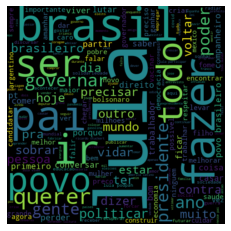

In [ ]:
wordcloud = WordCloud(width=480, height=480, margin=0).generate(lula)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0,y=0)
plt.show()

#### Emojis

In [ ]:
def extract_emojis(s):
    return ''.join(c for c in s if c in emoji.UNICODE_EMOJI['en'])

In [ ]:
poli.emojis.dropna().apply(extract_emojis).apply(lambda x: list(set(x)))

43         [👀]
87         [📢]
93         [📷]
95      [📷, 🏼]
100        [📷]
         ...  
6368       [😢]
6408    [🙏, 🏻]
6409    [🙏, 🏻]
6420       [🎯]
6421    [🙏, 🏻]
Name: emojis, Length: 523, dtype: object

In [ ]:
poli.emojis.dropna().apply(lambda x: x.replace('[','')).apply(lambda x: x.replace(']','')).apply(lambda x: x.split('\''))

43             [, 👀, ]
87           [, 📢📢📢, ]
93             [, 📷, ]
95      [, 🏼, , , 📷, ]
100            [, 📷, ]
             ...      
6368           [, 😢, ]
6408          [, 🙏🏻, ]
6409          [, 🙏🏻, ]
6420           [, 🎯, ]
6421          [, 🙏🏻, ]
Name: emojis, Length: 523, dtype: object

In [ ]:
poli.emojis.dropna().apply(lambda x: x)

43           ['👀']
87         ['📢📢📢']
93           ['📷']
95      ['🏼', '📷']
100          ['📷']
           ...    
6368         ['😢']
6408        ['🙏🏻']
6409        ['🙏🏻']
6420         ['🎯']
6421        ['🙏🏻']
Name: emojis, Length: 523, dtype: object